In [240]:
import pandas as pd
import sql_functions as sf
import numpy as np
import matplotlib.pyplot as plt

schema = 'organic_africa' # UPDATE 'TABLE_SCHEMA' based on schema used in class 
engine = sf.get_engine()

In [242]:
farmers_df = sf.get_dataframe(f'SELECT * FROM {schema}.all_farmers')
farmers_df.shape

(20610, 27)

In [243]:

farmers_df[farmers_df['wc_nr']==41453.0]

,org_table,org_table_ind,id,og_nr,og_code,production_unit,area,ward_nr/name,species,surname,...,address,organic_status,organic_status_from_date,fairtrade,ward_nr,wc_nr,wc_code,contract_duration,age_at_date_contracted,type
11490,wc_info_bayoba_1_df,2396,8482,NaN,None,Northern Eastern region,Mt Darwin,4,baobab,Tsingano,...,"Kapiripiri Pry Sch, Box 411, Mt Darwin",org,NaT,False,4.0,41453.0,MTWC,NaN,NaN,wc


In [244]:

farmers_df[farmers_df['og_nr']==14046.0]

,org_table,org_table_ind,id,og_nr,og_code,production_unit,area,ward_nr/name,species,surname,...,address,organic_status,organic_status_from_date,fairtrade,ward_nr,wc_nr,wc_code,contract_duration,age_at_date_contracted,type
7948,OG_Info_reserve__OGOrg_1_df,288,1905,14046.0,BNOG,Matabeleland North,Binga,5 Sinakoma,rosella,Munkuli,...,Dongamuse Pri school,org,2018-08-31,False,5.0,NaN,None,NaN,33.0,og


One of the OA Goal is to **offer long-term contracts**. That is following KPI are analyzed:

### How many partner farmers does Organic Africa have?

- OA has **20610** total farmers registered. 
- OA had **20609** contracts over the years and **1** farmers have no info about contracts.
- From total *20609 contracts* **44%** were with **OGs** and **56%** with **WCs**
- OA had **9298** drop outs from contracts.
- OA has currently total **11312** partner farmers.


In [245]:
contracted = farmers_df[~farmers_df['date_contracted'].isna() | ~farmers_df['date_dropped_out'].isna()]
dropped = farmers_df[~farmers_df['date_dropped_out'].isna()]

og = farmers_df[~farmers_df['og_nr'].isna()]
wc = farmers_df[~farmers_df['wc_nr'].isna()]
still_contracted = farmers_df[farmers_df['date_dropped_out'].isna()]


In [258]:
farmers_df['type'].value_counts()

wc    11517
og     9093
Name: type, dtype: int64

In [248]:
overview = {
    'contracts': contracted.shape[0],
    'og': '{:,.2%}'.format(og.shape[0]/contracted.shape[0]),
    'wc': '{:,.2%}'.format(wc.shape[0]/contracted.shape[0]),
    'dropped': dropped.shape[0],
    'current':still_contracted.shape[0]
}

overview

{'contracts': 20609,
 'og': '44.12%',
 'wc': '55.88%',
 'dropped': 9301,
 'current': 11309}

In [249]:
# reason_dropped_out over years

Regarding **contracts** 10 farmers of total 20610 registered farmers don't have date_contracted but 9 have a date_dropped out

Most of them are **wildcollectors** of the species **wild gotu kola** from the area **Chimanimani** with a **organic status**

In [250]:
# 10 farmers with date_contracted NaT but 9 have a date_dropped out

na_contracts_farmers = farmers_df[farmers_df['date_contracted'].isna()]
na_contracts_farmers[['surname','og_nr','wc_nr', 'area', 'species', 'organic_status','fairtrade', 'date_contracted', 'date_dropped_out', 'reason_dropped_out']]

,surname,og_nr,wc_nr,area,species,organic_status,fairtrade,date_contracted,date_dropped_out,reason_dropped_out
9126,Nyamayaro,13137.0,NaN,Mbire,rosella,dropout,False,NaT,2020-02-05,own choice
9127,Karimazaza,25706.0,NaN,Mbire,rosella,mabagrown,False,NaT,NaT,None
16484,Navaya,NaN,50881.0,Mudzi,"baobab, ximenia",new,False,NaT,2021-07-05,None
20603,Chikati,NaN,1871.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None
20604,Faifi,NaN,1861.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None
20605,Zaranyika,NaN,1057.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None
20606,Chibawana,NaN,21040.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None
20607,Hofisi,NaN,2555.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None
20608,Mudada,NaN,2066.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None
20609,Nyamwazha,NaN,1069.0,Chimanimani,wild gotu kola,reinstated,False,NaT,2021-01-29,None


## Trend of contracted farmers over year 

In [251]:
contracts_over_year = contracted.groupby([contracted['date_contracted'].dt.year.astype('Int64')])['date_contracted', 'og_nr', 'wc_nr', 'date_dropped_out'].count()

/var/folders/x5/v1d8l9v94679fhr8vd07ys9c0000gn/T/ipykernel_13236/328347199.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  contracts_over_year = contracted.groupby([contracted['date_contracted'].dt.year.astype('Int64')])['date_contracted', 'og_nr', 'wc_nr', 'date_dropped_out'].count()


The following table has the number of contracts and drops each year:

In [252]:
contracts_over_year.columns = ['total_contracted','num_og', 'num_wc', 'total_dropped']
contracts_over_year.index.names = ['YEAR']
contracts_over_year

,total_contracted,num_og,num_wc,total_dropped
YEAR,,,,
1979,1,0,1,0
1982,1,0,1,0
1985,1,1,0,1
1989,1,0,1,0
2011,11,11,0,5
2012,512,90,422,104
2013,413,52,361,71
2014,1507,41,1466,839
2015,1128,47,1081,54


The graphic shows a peak in 2018 for new contracts AND dropouts!

<Axes: xlabel='YEAR'>

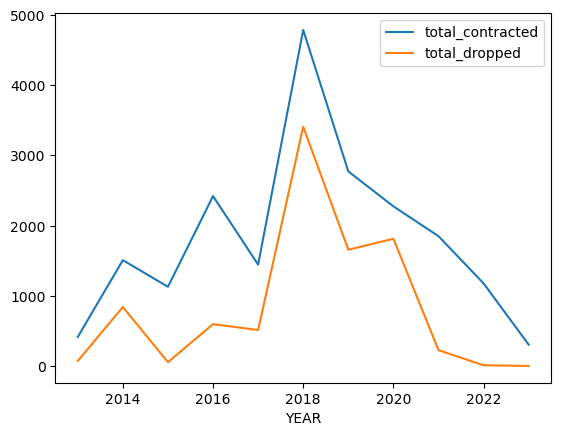

In [253]:
contracts_over_year[contracts_over_year.index>2012][['total_contracted', 'total_dropped']].plot()

In [255]:
#contracts_over_year.plot.scatter(x='total', y='total_dropped', alpha=0.5)

**Dropped** has similar statistics like **og** 

In [ ]:
contracts_over_year.describe()

,total,og,wc,total_dropped
count,17.000000,17.000000,17.000000,17.000000
mean,1051.117647,516.411765,534.705882,546.588235
std,1319.511315,957.281572,589.823784,933.998733
min,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000
50%,512.000000,47.000000,361.000000,71.000000
75%,1507.000000,506.000000,1081.000000,595.000000
max,4788.000000,3390.000000,1466.000000,3409.000000


In [ ]:
contracts_over_year['total']

YEAR
1979       1
1982       1
1985       1
1989       1
2011       1
2012     512
2013     413
2014    1507
2015    1128
2016       1
2017    1443
2018    4788
2019    2772
2020    2274
2021    1849
2022    1176
2023       1
Name: total, dtype: int64

<Axes: xlabel='og', ylabel='total_dropped'>

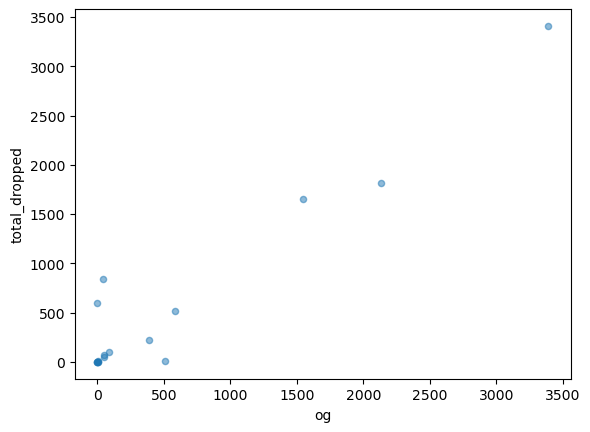

In [ ]:
contracts_over_year.plot.scatter(x='og', y='total_dropped', alpha=0.5)

In [ ]:
def calc_distr(row):
     row['og'] = round(row['og']/row['total'], 4)
     row['wc'] = round(row['wc']/row['total'], 4)
     row['total'] = row["og"]+row["wc"]
     return row

In [ ]:
contracts_over_year_percent = contracts_over_year
contracts_over_year_percent.columns = ['total','og','wc','total_dropped']

contracts_over_year_percent = contracts_over_year_percent.apply(calc_distr, axis=1)

contracts_over_year_percent['majority'] = contracts_over_year_percent[['og','wc']].idxmax(axis=1)

contracts_over_year_percent['og'] = contracts_over_year_percent['og'].transform(lambda x: '{:,.0%}'.format(x), axis=0)
contracts_over_year_percent['wc'] = contracts_over_year_percent['wc'].transform(lambda x: '{:,.0%}'.format(x))
contracts_over_year_percent['total'] = contracts_over_year_percent['total'].transform(lambda x: '{:,.0%}'.format(x))
del contracts_over_year_percent['total_dropped']

contracts_over_year_percent = contracts_over_year_percent[['og','wc','total','majority']]
contracts_over_year_percent

,og,wc,total,majority
YEAR,,,,
1979,0%,100%,100%,wc
1982,0%,100%,100%,wc
1985,100%,0%,100%,og
1989,0%,100%,100%,wc
2011,100%,0%,100%,og
2012,18%,82%,100%,wc
2013,13%,87%,100%,wc
2014,3%,97%,100%,wc
2015,4%,96%,100%,wc


In [ ]:
# contracs-dropped per year

Over the years **~ 64,7%** of the partner farmers of OA are **Wildcollector**

But since 2018 many **OG** are contracted -> 

In [ ]:
# From 1979 to 2023
# wc majority    11 times
# og majority     6 times

maj = contracts_over_year_percent['majority'].value_counts()
maj[0]/(maj[0]+maj[1])

0.6470588235294118

contracts_over_year_from_2012 = contracts_over_year[contracts_over_year.index>2012]
contracts_over_year_from_2012

over_years_from_2012 = contracts_over_year_from_2012.index
contracted_farmers_type = {
    'WC': contracts_over_year_from_2012['num_wc'],
    'OG': contracts_over_year_from_2012['num_og'],
}
width = 0.85  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()
bottom = np.zeros(3)

for farmer_type, type_count in contracted_farmers_type.items():
    p = ax.bar(over_years_from_2012, type_count, width, label=farmer_type, bottom=bottom)
    bottom += type_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of contracts by partners farmers type')
ax.legend()

plt.show()

#### Cumulative sum

In [ ]:
cum_contracts_over_year = contracts_over_year.cumsum()
cum_contracts_over_year.columns = ['cum_sum_contracted','cum_sum_og', 'cum_sum_wc', 'cum_sum_dropped']
cum_contracts_over_year

,cum_sum_contracted,cum_sum_og,cum_sum_wc,cum_sum_dropped
YEAR,,,,
1979,1,0,1,0
1982,2,0,2,0
1985,3,1,2,1
1989,4,1,3,1
2011,5,2,3,6
2012,517,92,425,110
2013,930,144,786,181
2014,2437,185,2252,1020
2015,3565,232,3333,1074


<Axes: xlabel='YEAR'>

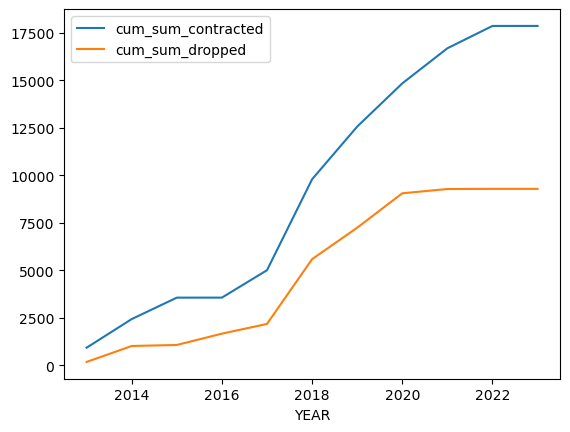

In [ ]:
cum_contracts_over_year[cum_contracts_over_year.index>2012][['cum_sum_contracted', 'cum_sum_dropped']].plot()

<Axes: xlabel='YEAR'>

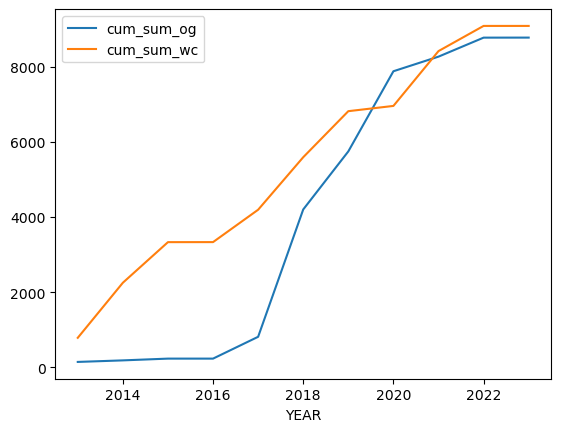

In [ ]:
cum_contracts_over_year[cum_contracts_over_year.index>2012][['cum_sum_og', 'cum_sum_wc']].plot()

over_years_from_2012 = cum_contracts_over_year_from_2012.index
contracted_farmers_type = {
    'WC': cum_contracts_over_year_from_2012['cum_sum_wc'],
    'OG': cum_contracts_over_year_from_2012['cum_sum_og'],
}
width = 0.85  # the width of the bars: can also be len(x) sequence


fig, ax = plt.subplots()

for farmer_type, type_count in contracted_farmers_type.items():
    p = ax.bar(over_years_from_2012, type_count, width, label=farmer_type)
    #bottom += type_count

    ax.bar_label(p, label_type='center')

ax.set_title('Number of contracts by partners farmers type')
ax.legend()

plt.show()

## How long do farmers stick with OA?

In [ ]:
duration = 12 * (farmers_df['date_dropped_out'].dt.year - farmers_df['date_contracted'].dt.year) + farmers_df['date_dropped_out'].dt.month - farmers_df['date_contracted'].dt.month
duration = duration[~duration.isna()]
duration

614       0.0
766       3.0
775       3.0
777       3.0
779       6.0
         ... 
20598    27.0
20599    27.0
20600    27.0
20601    27.0
20602    27.0
Length: 9292, dtype: float64

In [ ]:
duration.info()

<class 'pandas.core.series.Series'>
Int64Index: 9292 entries, 614 to 20602
Series name: None
Non-Null Count  Dtype  
--------------  -----  
9292 non-null   float64
dtypes: float64(1)
memory usage: 403.2 KB


In [ ]:
duration.describe()

count    9292.000000
mean       20.728046
std        13.937534
min         0.000000
25%        14.000000
50%        17.000000
75%        26.000000
max       398.000000
dtype: float64

In [ ]:
duration.median()

17.0

In [ ]:
duration_without_max = duration.drop(duration.idxmax())

<Axes: title={'center': 'Distribution of Contract Duration'}, xlabel='Months'>

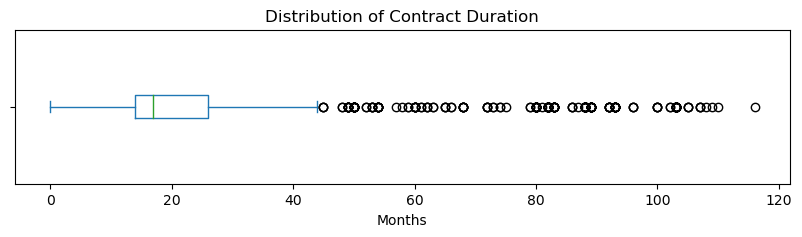

In [ ]:
plt.figure(figsize=(10,2))
plt.title("Distribution of Contract Duration")
plt.xlabel('Months')
# PLOT of duration
duration_without_max.plot(kind='box', vert=False)


In [ ]:
# Compare OG and WC

In [ ]:
farmers_df['reason_dropped_out'] = farmers_df['reason_dropped_out'].replace('no production 2016','insufficient production')
farmers_df['reason_dropped_out'] = farmers_df['reason_dropped_out'].replace('no production 2015','insufficient production')
farmers_df['reason_dropped_out'] = farmers_df['reason_dropped_out'].replace('insufficient production 2015','insufficient production')
farmers_df['reason_dropped_out'] = farmers_df['reason_dropped_out'].replace('not externally inspected','not inspected')
farmers_df['reason_dropped_out'] = farmers_df['reason_dropped_out'].replace('high contamination risk','high risk')

In [ ]:
# Reason for dropping out
reasons = farmers_df['reason_dropped_out'].value_counts()
reasons

own choice                     3776
area closed                    2397
insufficient production        1131
not inspected                   144
transfer to another db          114
insufficient documentation       20
duplicate                        17
high risk                        16
insufficient buffer zone         10
collection in banana plants       8
deceased                          5
health reasons                    5
two outgrowers in family          1
Name: reason_dropped_out, dtype: int64

In [ ]:
labels = reasons.index

([<matplotlib.patches.Wedge at 0x164170cd0>,
 [Text(0.02079479943546925, 1.0998034262159937, 'own choice'),
  Text(-0.6422404214408716, -0.8930438069140012, 'area closed'),
  Text(0.8091190240080027, -0.7452022577719001, 'insufficient production'),
  Text(1.073417638856943, -0.24036341774651504, 'not inspected'),
  Text(1.0928280389009681, -0.1254068474680087, 'transfer to another db'),
  Text(1.0980741661074704, -0.06506247557066694, 'insufficient documentation'),
  Text(1.0989365476871713, -0.04835766906501697, 'duplicate'),
  Text(1.0994913135707214, -0.03344923590353062, 'high risk'),
  Text(1.0997859633695695, -0.021698727503431547, 'insufficient buffer zone'),
  Text(1.0999163904439098, -0.013562228166529413, 'collection in banana plants'),
  Text(1.0999731519132974, -0.007685380272052376, 'deceased'),
  Text(1.0999954479435203, -0.0031645700394047787, 'health reasons'),
  Text(1.0999999071126203, -0.0004520533451126793, 'two outgrowers in family')])

<Figure size 300x300 with 0 Axes>

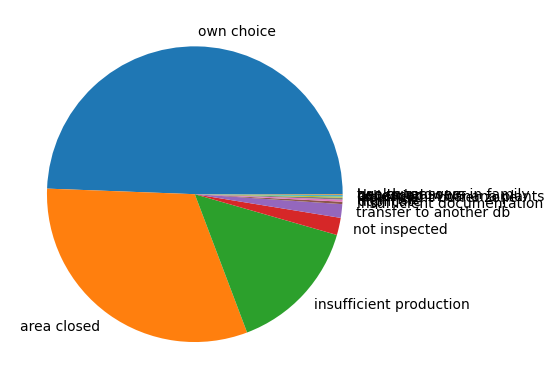

In [ ]:
plt.figure(figsize=(3,3))
fig, ax = plt.subplots()
ax.pie(reasons, labels=labels)

## Do organic certified farmers grow over time?

In [ ]:
farmers_df['organic_status'].value_counts()

org             9532
dropout         6984
new             2697
mabagrown       1047
reinstated       190
uncertified      149
under review      10
Name: organic_status, dtype: int64

In [ ]:
organic_df = farmers_df[['og_nr', 'wc_nr', 'organic_status', 'organic_status_from_date']]

In [ ]:
organic_df.set_index(['organic_status'])

,og_nr,wc_nr,organic_status_from_date
organic_status,,,
new,20183.0,NaN,2023-02-24
new,20290.0,NaN,2023-02-24
new,20254.0,NaN,2023-02-24
new,20255.0,NaN,2023-02-24
new,20256.0,NaN,2023-02-24
...,...,...,...
reinstated,NaN,1057.0,2019-03-09
reinstated,NaN,21040.0,2019-03-09
reinstated,NaN,2555.0,NaT


In [ ]:
farmers_df[~farmers_df['organic_status_from_date'].isna()][['og_nr', 'wc_nr', 'organic_status', 'organic_status_from_date']]

,og_nr,wc_nr,organic_status,organic_status_from_date
0,20183.0,NaN,new,2023-02-24
1,20290.0,NaN,new,2023-02-24
2,20254.0,NaN,new,2023-02-24
3,20255.0,NaN,new,2023-02-24
4,20256.0,NaN,new,2023-02-24
...,...,...,...,...
20604,NaN,1861.0,reinstated,2019-03-09
20605,NaN,1057.0,reinstated,2019-03-09
20606,NaN,21040.0,reinstated,2019-03-09
20608,NaN,2066.0,reinstated,2019-03-09


In [ ]:
farmers_df[~farmers_df['organic_status_from_date'].isna()][['organic_status','organic_status_from_date']]


,organic_status,organic_status_from_date
0,new,2023-02-24
1,new,2023-02-24
2,new,2023-02-24
3,new,2023-02-24
4,new,2023-02-24
...,...,...
20605,reinstated,2019-03-09
20606,reinstated,2019-03-09
20607,reinstated,NaT
20608,reinstated,2019-03-09
